# Regression Analysis

Dataset used --> https://www.kaggle.com/mazenramadan/imdb-most-popular-films-and-series

In [734]:
# Import Libraries

In [735]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [736]:
# Read dataset 

In [737]:
imdb_data = pd.read_csv('imdb.csv')

In [738]:
imdb_data.head()

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"1,07,163","Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate


In [739]:
# lets find out the information about the dataset

In [740]:
imdb_data.shape

(6178, 14)

In [741]:
imdb_data.describe()

,Date
count,6178.000000
mean,2005.952574
std,15.910248
min,1922.000000
25%,1998.000000
50%,2011.000000
75%,2019.000000
max,2023.000000


In [742]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         6178 non-null   object
 1   Date         6178 non-null   int64 
 2   Rate         6178 non-null   object
 3   Votes        6178 non-null   object
 4   Genre        6178 non-null   object
 5   Duration     6178 non-null   object
 6   Type         6178 non-null   object
 7   Certificate  6178 non-null   object
 8   Episodes     6178 non-null   object
 9   Nudity       6178 non-null   object
 10  Violence     6178 non-null   object
 11  Profanity    6178 non-null   object
 12  Alcohol      6178 non-null   object
 13  Frightening  6178 non-null   object
dtypes: int64(1), object(13)
memory usage: 675.8+ KB


Above information of the dataset tell us - 
1. We have 14 features and 6178 observations
2. 1 int data type and 13 object types but there is mistake, some of the featues supposed to be integers but implied as object
3. It says there is no null values present but from the data set we can say that there is some

Cleansing needed here...
Let us Clean the data

In [743]:
imdb_data.head()

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"1,07,163","Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate


# Preprocessing

Lets find out the categories first

In [744]:
imdb_data['Date'].value_counts()

2021    736
2019    360
2020    343
2018    251
2017    220
       ... 
1927      1
1951      1
1948      1
1940      1
1922      1
Name: Date, Length: 91, dtype: int64

In [745]:
imdb_data['Name'].value_counts()

King Kong               5
Robin Hood              4
Cat People              4
The Mummy               4
The Saint               4
                       ..
Scary Movie 2           1
Road House              1
Dead Ringers            1
Contratiempo            1
Hot Tub Time Machine    1
Name: Name, Length: 4820, dtype: int64

In [746]:
imdb_data['Genre'].value_counts()

Comedy                        268
Drama                         259
Crime, Drama, Mystery         220
Comedy, Drama                 199
Drama, Romance                189
                             ... 
Comedy, Talk-Show               1
Comedy, Mystery, Romance        1
Drama, Fantasy, History         1
Animation, Comedy, Romance      1
Family, Fantasy, Romance        1
Name: Genre, Length: 377, dtype: int64

In [747]:
imdb_data['Type'].value_counts() # Feature Type only has 2 categories, No cleaning needed

Film      4446
Series    1732
Name: Type, dtype: int64

In [748]:
imdb_data['Certificate'].value_counts()
# In Certificate column, Have null values(None) and Rating Not rated is equivalent to Unrated 

R            1885
PG-13        1147
TV-MA         641
TV-14         575
PG            530
None          450
TV-PG         336
Not Rated     231
TV-G           95
G              70
Approved       42
Unrated        40
TV-Y7          34
Passed         24
NC-17          14
TV-Y           13
E              12
TV-Y7-FV       11
(Banned)       11
GP              6
X               6
M               3
M/PG            2
Name: Certificate, dtype: int64

In [749]:
imdb_data['Certificate']=imdb_data['Certificate'].replace({'Not Rated':'Unrated'}) 
# replacing Not rated with Unrated

In [750]:
imdb_data['Episodes'].value_counts()
# In Episodes column There is so many null values(here represented as -)
# So we can drop this column

-      4446
10       82
20       65
16       53
12       49
       ... 
376       1
251       1
731       1
288       1
140       1
Name: Episodes, Length: 284, dtype: int64

In [751]:
imdb_data.drop(['Episodes'],inplace=True,axis=1) # Dropping episodes column

In [752]:
imdb_data.head()

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"1,07,163","Action, Adventure, Thriller",163,Film,PG-13,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,None,Moderate,None,Mild,Moderate


In [753]:
imdb_data['Nudity'].value_counts() # In Nudity column there is null values
imdb_data['Nudity']=imdb_data['Nudity'].replace({'No Rate':0,'Mild':1,'Moderate':2,'Severe':3,'None':0})
imdb_data['Nudity'].value_counts()

1    2292
0    2166
2    1251
3     469
Name: Nudity, dtype: int64

In [754]:
imdb_data['Violence'].value_counts()
imdb_data['Violence']=imdb_data['Violence'].replace({'No Rate':0,'Mild':1,'Moderate':2,'Severe':3,'None':0})

In [755]:
imdb_data['Profanity'].value_counts()
imdb_data['Profanity']=imdb_data['Profanity'].replace({'No Rate':0,'Mild':1,'Moderate':2,'Severe':3,'None':0})

In [756]:
imdb_data['Alcohol'].value_counts()
imdb_data['Alcohol']=imdb_data['Alcohol'].replace({'No Rate':0,'Mild':1,'Moderate':2,'Severe':3,'None':0})

In [757]:
imdb_data['Frightening'].value_counts()
imdb_data['Frightening']=imdb_data['Frightening'].replace({'No Rate':0,'Mild':1,'Moderate':2,'Severe':3,'None':0})

In [758]:
imdb_data['Rate']=imdb_data['Rate'].replace({'None':np.nan})
imdb_data['Votes']=imdb_data['Votes'].replace({'None':np.nan})
imdb_data['Genre']=imdb_data['Genre'].replace({'None':np.nan})
imdb_data['Duration']=imdb_data['Duration'].replace({'None':np.nan})
imdb_data['Certificate']=imdb_data['Certificate'].replace({'None':np.nan})
imdb_data['Votes']=imdb_data['Votes'].replace({'No Votes':'NoVotes'})
imdb_data['Votes']=imdb_data['Votes'].replace({'NoVotes':np.nan})

In [759]:
imdb_data.head()

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"1,07,163","Action, Adventure, Thriller",163,Film,PG-13,1,2,1,1,2
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,0,0,3,0,2
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,2,3,3,2,2
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,0,2,2,1,2
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,0,2,0,1,2


In [760]:
imdb_data.isnull().sum().sum()/len(imdb_data)*100 # 12% data are null so we can drop

15.150534153447717

In [761]:
imdb_data=imdb_data.dropna()

In [762]:
imdb_data.isnull().sum().sum()/len(imdb_data)*100 # Null values have treated

0.0

In [763]:
# Now lets find duplicated values

In [764]:
imdb_data.duplicated().sum()/len(imdb_data)*100 # 18 % data are duplicated lets drop it 

18.28438395415473

In [765]:
imdb_data=imdb_data.drop_duplicates(keep = 'first')

In [766]:
imdb_data.duplicated().sum()/len(imdb_data)*100 # Duplicated data have been treated

0.0

In [767]:
imdb_data.shape

(4563, 13)

In [768]:
# Lets remove the commas present in features

In [769]:
imdb_data.head()

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"1,07,163","Action, Adventure, Thriller",163,Film,PG-13,1,2,1,1,2
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,0,0,3,0,2
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,2,3,3,2,2
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,0,2,2,1,2
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,0,2,0,1,2


In [770]:
imdb_data['Genre'] = imdb_data['Genre'].str.replace(' ', '')
genre_cols = imdb_data['Genre'].str.get_dummies(sep=',')

In [771]:
imdb_data.drop('Genre', axis=1, inplace=True)

In [772]:
imdb_data = pd.concat([imdb_data, genre_cols], axis=1)

In [773]:
imdb_data['Votes'] = imdb_data['Votes'].str.replace(',', '')

In [774]:
imdb_data.head()

,Name,Date,Rate,Votes,Duration,Type,Certificate,Nudity,Violence,Profanity,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,No Time to Die,2021,7.6,107163,163,Film,PG-13,1,2,1,...,0,0,0,0,0,0,0,1,0,0
1,The Guilty,2021,6.3,64375,90,Film,R,0,0,3,...,0,0,0,0,0,0,0,1,0,0
2,The Many Saints of Newark,2021,6.4,27145,120,Film,R,2,3,3,...,0,0,0,0,0,0,0,0,0,0
3,Venom: Let There Be Carnage,2021,6.4,30443,97,Film,PG-13,0,2,2,...,0,0,0,1,0,0,0,0,0,0
4,Dune,2021,8.3,84636,155,Film,PG-13,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [775]:
# Lets change to appropriate data type

In [776]:
imdb_data['Duration'] = imdb_data['Duration'].astype('int')

In [777]:
imdb_data['Votes'] = imdb_data['Votes'].astype('int')

In [778]:
imdb_data['Rate'] = imdb_data['Rate'].astype('float')

In [779]:
imdb_data.dtypes

Name            object
Date             int64
Rate           float64
Votes            int32
Duration         int32
Type            object
Certificate     object
Nudity           int64
Violence         int64
Profanity        int64
Alcohol          int64
Frightening      int64
Action           int64
Adventure        int64
Animation        int64
Biography        int64
Comedy           int64
Crime            int64
Documentary      int64
Drama            int64
Family           int64
Fantasy          int64
Film-Noir        int64
Game-Show        int64
History          int64
Horror           int64
Music            int64
Musical          int64
Mystery          int64
News             int64
Reality-TV       int64
Romance          int64
Sci-Fi           int64
Short            int64
Sport            int64
Talk-Show        int64
Thriller         int64
War              int64
Western          int64
dtype: object

In [780]:
imdb_data.head()

,Name,Date,Rate,Votes,Duration,Type,Certificate,Nudity,Violence,Profanity,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,No Time to Die,2021,7.6,107163,163,Film,PG-13,1,2,1,...,0,0,0,0,0,0,0,1,0,0
1,The Guilty,2021,6.3,64375,90,Film,R,0,0,3,...,0,0,0,0,0,0,0,1,0,0
2,The Many Saints of Newark,2021,6.4,27145,120,Film,R,2,3,3,...,0,0,0,0,0,0,0,0,0,0
3,Venom: Let There Be Carnage,2021,6.4,30443,97,Film,PG-13,0,2,2,...,0,0,0,1,0,0,0,0,0,0
4,Dune,2021,8.3,84636,155,Film,PG-13,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [781]:
# Lets do encoding on Type and Certificate

In [782]:
type_cols = imdb_data['Type'].str.get_dummies() # Or type_cols=pd.get_dummies(df['Type'])
imdb_data.drop('Type', axis=1, inplace=True)
imdb_data = pd.concat([imdb_data, type_cols], axis=1)

In [783]:
cert_cols = imdb_data['Certificate'].str.get_dummies()
imdb_data.drop('Certificate', axis=1, inplace=True)
imdb_data = pd.concat([imdb_data, cert_cols], axis=1)

In [784]:
imdb_data.head()

,Name,Date,Rate,Votes,Duration,Nudity,Violence,Profanity,Alcohol,Frightening,...,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,Unrated,X
0,No Time to Die,2021,7.6,107163,163,1,2,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,The Guilty,2021,6.3,64375,90,0,0,3,0,2,...,1,0,0,0,0,0,0,0,0,0
2,The Many Saints of Newark,2021,6.4,27145,120,2,3,3,2,2,...,1,0,0,0,0,0,0,0,0,0
3,Venom: Let There Be Carnage,2021,6.4,30443,97,0,2,2,1,2,...,0,0,0,0,0,0,0,0,0,0
4,Dune,2021,8.3,84636,155,0,2,0,1,2,...,0,0,0,0,0,0,0,0,0,0


# Assumptions

## Linear Regression

In [785]:
x = imdb_data.drop(['Rate','Name'], axis=1)
y = imdb_data['Rate'].values

1. Multicollinearity

In [786]:
# To check Multicollinearity we are using VIF

In [787]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [788]:
vif1 = pd.DataFrame()
vif1["feature"] = x.columns
  
# calculating VIF for each feature
vif1["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif1)

C:\Users\DREAM\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


        feature       VIF
0          Date  1.318357
1         Votes  1.270887
2      Duration  2.340749
3        Nudity  1.648926
4      Violence  3.483248
5     Profanity  2.415522
6       Alcohol  1.707881
7   Frightening  3.134976
8        Action  1.924849
9     Adventure  1.984016
10    Animation  1.687836
11    Biography  1.242118
12       Comedy  2.274460
13        Crime  1.519270
14  Documentary  1.167419
15        Drama  2.051483
16       Family  1.574031
17      Fantasy  1.242494
18    Film-Noir  1.140038
19    Game-Show  1.646286
20      History  1.210343
21       Horror  2.064910
22        Music  1.059285
23      Musical  1.037824
24      Mystery  1.329302
25         News  1.014691
26   Reality-TV  1.806182
27      Romance  1.413350
28       Sci-Fi  1.304927
29        Short  1.090191
30        Sport  1.072725
31    Talk-Show  1.005074
32     Thriller  1.566745
33          War  1.082703
34      Western  1.091204
35         Film       inf
36       Series       inf
37     (Bann

In [789]:
# There is no multicollinearity here

2. Linearity

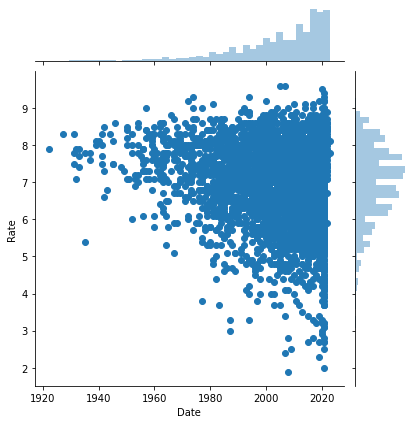

In [791]:
sns.jointplot(imdb_data['Date'],imdb_data['Rate' ])

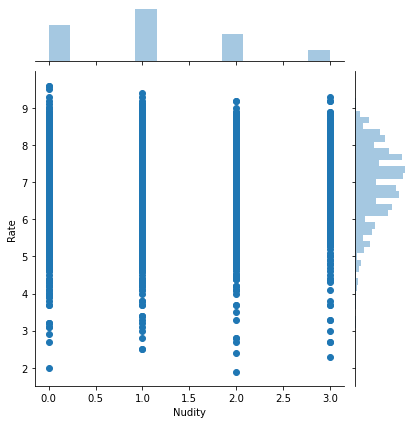

In [792]:
sns.jointplot(imdb_data['Nudity'],imdb_data['Rate' ])

# Modelling

In [793]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [794]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [795]:
# Lets do scaling

In [796]:
from sklearn.preprocessing import StandardScaler
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

In [797]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [798]:
y_pred=regressor.predict(x_test)

In [799]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5603767822173742
Mean Squared Error: 0.569308986200355
Root Mean Squared Error: 0.7545256696762245
